In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

In [3]:
df = pd.read_csv("hiring.csv")
df.columns = ["experience", "test_score", "interview_score", "salary"]
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
df.experience = df.experience.fillna("zero")
df.test_score = df.test_score.fillna(math.floor(df.test_score.mean()))
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


Text(0.5, 1.0, 'Experience vs Salary')

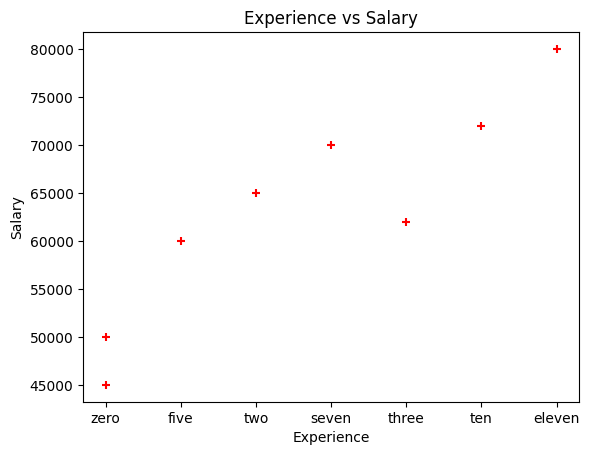

In [ ]:
plt.scatter(df.experience, df.salary, color='red', marker='+')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()

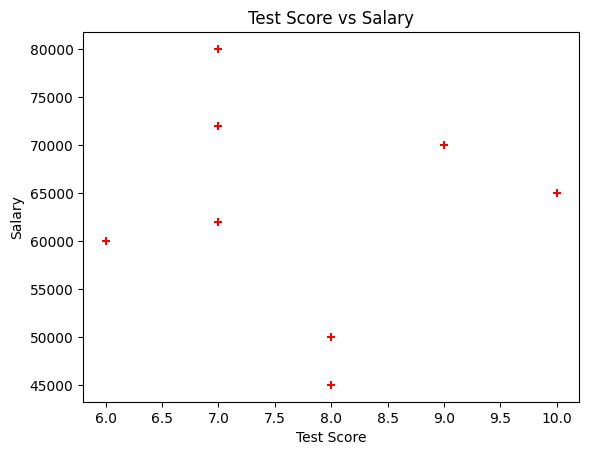

In [6]:
plt.scatter(df.test_score, df.salary, color='red', marker='+')
plt.xlabel("Test Score")
plt.ylabel("Salary")
plt.title("Test Score vs Salary")
plt.show()

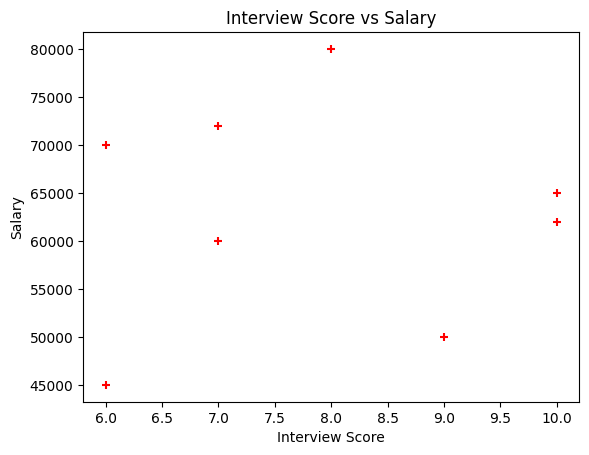

In [7]:
plt.scatter(df.interview_score, df.salary, color='red', marker='+')
plt.xlabel("Interview Score")
plt.ylabel("Salary")
plt.title("Interview Score vs Salary")
plt.show()

In [8]:
from word2number import w2n

In [9]:
df["experience"] = df["experience"].apply(lambda x: w2n.word_to_num(x))
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [10]:
reg = linear_model.LinearRegression()
reg.fit(df[["experience", "test_score", 'interview_score']], df.salary)

LinearRegression()

In [11]:
reg.coef_, reg.intercept_

(array([2922.26901502, 2221.30909959, 2147.48256637]), 14992.651446693111)

In [12]:
reg.predict([[2, 9, 6]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [13]:
reg.predict([[12, 10, 10]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])